In [1]:
import numpy as np
import pandas as pd

#import scipy
import matplotlib.pyplot as plt
#import os
#from scipy import io

import seaborn as sns
#import feather

#import pysubgroup as ps

#from scipy import stats
#from scipy.stats import zscore
#from sklearn.preprocessing import StandardScaler
#from sklearn import preprocessing
#from sklearn.model_selection import train_test_split

#from sklearn.cluster import KMeans
#from sklearn import preprocessing

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# Read Head
df_eban = pd.read_excel('../Data1/EBAN.XLSX')

In [4]:
df_eban.head(4)

,BANFN,BNFPO,BSART,BSTYP,BSAKZ,LOEKZ,STATU,ESTKZ,FRGKZ,FRGZU,FRGST,EKGRP,ERNAM,ERDAT,AFNAM,TXZ01,MATNR,EMATN,WERKS,LGORT,BEDNR,MATKL,RESWK,MENGE,MEINS,BUMNG,BADAT,LPEIN,LFDAT,FRGDT,WEBAZ,PREIS,PEINH,PSTYP,KNTTP,KZVBR,KFLAG,VRTKZ,TWRKZ,WEPOS,WEUNB,REPOS,LIFNR,FLIEF,EKORG,VRTYP,KONNR,KTPNR,INFNR,ZUGBA,QUNUM,QUPOS,DISPO,SERNR,BVDAT,BATOL,BVDRK,EBELN,EBELP,BEDAT,BSMNG,LBLNI,BWTAR,XOBLR,EBAKZ,RSNUM,SOBKZ,ARSNR,ARSPS,FIXKZ,BMEIN,REVLV,VORAB,PACKNO,KANBA,BPUEB,CUOBJ,FRGGR,FRGRL,AKTNR,CHARG,UMSOK,VERID,FIPOS,FISTL,GEBER,KZKFG,SATNR,MNG02,DAT01,ATTYP,ADRNR,ADRN2,KUNNR,EMLIF,LBLKZ,KZBWS,WAERS,IDNLF,GSFRG,MPROF,KZFME,SPRAS,TECHS,MFRPN,MFRNR,EMNFR,FORDN,FORDP,PLIFZ,BERID,UZEIT,FKBER,GRANT_NBR,MEMORY,BANPR,RLWRT,BLCKD,REVNO,BLCKT,BESWK,EPROFILE,EPREFDOC,EPREFITM,GMMNG,WRTKZ,RESLO,KBLNR,KBLPOS,PRIO_URG,PRIO_REQ,MEMORYTYPE,ANZSN,MHDRZ,IPRKZ,NODISP,SRM_CONTRACT_ID,SRM_CONTRACT_ITM,BUDGET_PD,FMFGUS_KEY,ADVCODE,STACODE,BANFN_CS,BNFPO_CS,ITEM_CS,BSMNG_SND,IUID_RELEVANT,SGT_SCAT,SGT_RCAT
0,10000000,0,NB,B,NaN,NaN,B,B,NaN,NaN,NaN,200,Muesli Contr,2021-01-25,Muesli Contr,Large Box (1kg),FF-P01,NaN,FF,NaN,NaN,FF-MANUF,NaN,324000,ST,0,2021-01-25,1,2021-02-01,2021-01-31,0,0.28,1,0,NaN,NaN,NaN,NaN,NaN,X,NaN,X,NaN,V02,FF,NaN,NaN,0,NaN,NaN,NaN,0,101,NaN,NaN,0,0,4500000001,10,2021-01-25,324000,NaN,NaN,NaN,NaN,0,NaN,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EUR,NaN,NaN,NaN,NaN,EN,NaN,NaN,NaN,NaN,NaN,0,1,NaN,00:00:00,NaN,NaN,NaN,2,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,0,0,0,NaN,0,0,T,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,0,NaN,NaN,NaN
1,10000001,0,NB,B,NaN,NaN,B,B,NaN,NaN,NaN,200,Muesli Contr,2021-01-25,Muesli Contr,Large Bag (1kg),FF-P02,NaN,FF,NaN,NaN,FF-MANUF,NaN,324000,ST,0,2021-01-25,1,2021-02-01,2021-01-31,0,0.12,1,0,NaN,NaN,NaN,NaN,NaN,X,NaN,X,NaN,V02,FF,NaN,NaN,0,NaN,NaN,NaN,0,101,NaN,NaN,0,0,4500000001,20,2021-01-25,324000,NaN,NaN,NaN,NaN,0,NaN,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EUR,NaN,NaN,NaN,NaN,EN,NaN,NaN,NaN,NaN,NaN,0,1,NaN,00:00:00,NaN,NaN,NaN,2,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,0,0,0,NaN,0,0,T,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,0,NaN,NaN,NaN
2,10000002,0,NB,B,NaN,NaN,B,B,NaN,NaN,NaN,200,Muesli Contr,2021-01-25,Muesli Contr,Small Box (500g),FF-P03,NaN,FF,NaN,NaN,FF-MANUF,NaN,204000,ST,0,2021-01-25,1,2021-02-01,2021-01-31,0,0.21,1,0,NaN,NaN,NaN,NaN,NaN,X,NaN,X,NaN,V02,FF,NaN,NaN,0,NaN,NaN,NaN,0,101,NaN,NaN,0,0,4500000001,30,2021-01-25,204000,NaN,NaN,NaN,NaN,0,NaN,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EUR,NaN,NaN,NaN,NaN,EN,NaN,NaN,NaN,NaN,NaN,0,1,NaN,00:00:00,NaN,NaN,NaN,2,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,0,0,0,NaN,0,0,T,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,0,NaN,NaN,NaN
3,10000003,0,NB,B,NaN,NaN,B,B,NaN,NaN,NaN,200,Muesli Contr,2021-01-25,Muesli Contr,Small Bag (500g),FF-P04,NaN,FF,NaN,NaN,FF-MANUF,NaN,204000,ST,0,2021-01-25,1,2021-02-01,2021-01-31,0,0.09,1,0,NaN,NaN,NaN,NaN,NaN,X,NaN,X,NaN,V02,FF,NaN,NaN,0,NaN,NaN,NaN,0,101,NaN,NaN,0,0,4500000001,40,2021-01-25,204000,NaN,NaN,NaN,NaN,0,NaN,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EUR,NaN,NaN,NaN,NaN,EN,NaN,NaN,NaN,NaN,NaN,0,1,NaN,00:00:00,NaN,NaN,NaN,2,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,0,0,0,NaN,0,0,T,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,0,NaN,NaN,NaN


In [5]:
#df_bseg = pd.read_excel('../Data3/bseg1.XLSX')

In [6]:
print(df_eban.shape)


(1828, 149)


# Data Cleansing

## initial cleaning

In [7]:
df = df_eban.copy()

In [8]:

# Spalten die nur NAN enthalten entfernen
df = df.dropna(axis=1, how='all')


# Spalten die ausschließlich XY Werte enthalten (0 / X / 1 / etc.) dropen
df = df.loc[:, (df.astype(str) != 0).any(axis=0)]
df = df.loc[:, (df.astype(str) != '0,0').any(axis=0)]
df = df.loc[:, (df.astype(str) != '0,00').any(axis=0)]
df = df.loc[:, (df.astype(str) != '0,000').any(axis=0)]
df = df.loc[:, (df.astype(str) != 'X').any(axis=0)]
df = df.loc[:, (df.astype(str) != '1').any(axis=0)]



#spaletn entfernen die immer die selben Werte enthalten
#nunique = df.apply(pd.Series.nunique)
#cols_to_drop = nunique[nunique == 1].index
#df = df.drop(cols_to_drop, axis=1)
#df.drop(columns=df.columns[df.nunique()==1], inplace=True)

keep_columns = [col for col in df.columns if len(df[col].unique()) > 1]
df = df[keep_columns].copy()


#print(len(df_io.index))
print(df.shape)

(1828, 20)


In [9]:
# we looose many features here, hence data unity. 
# add time and date

In [19]:
df.sample(10)

,BANFN,EKGRP,ERDAT,TXZ01,MATNR,WERKS,MATKL,MENGE,MEINS,BADAT,LFDAT,FRGDT,PREIS,FLIEF,EBELN,EBELP,BEDAT,BSMNG,SPRAS
1051,10001094,100,2021-02-01,Wheat,R05,DD,MANUF,27900,KG,2021-02-01,2021-03-01,2021-02-28,1.29,V01,4500000263,50,2021-02-01,27900,EN
1736,10001851,200,2021-02-04,Small Box (500g),P03,FF,MANUF,162000,ST,2021-02-04,2021-03-01,2021-02-28,0.26,V02,4500000436,30,2021-02-04,162000,EN
971,10001000,100,2021-01-28,Blueberries,R02,CC,MANUF,5450,KG,2021-01-28,2021-02-01,2021-01-31,5.10,V01,4500000243,20,2021-01-28,5450,EN
535,10000550,100,2021-01-25,Oats,R06,DD,MANUF,44850,KG,2021-01-25,2021-02-01,2021-01-31,0.62,V01,4500000135,50,2021-01-25,44850,EN
337,10000344,100,2021-01-25,Oats,R06,HH,MANUF,52650,KG,2021-01-25,2021-02-01,2021-01-31,0.75,V01,4500000083,60,2021-01-25,52650,DE
681,10000703,200,2021-01-28,Small Bag (500g),P04,FF,MANUF,135000,ST,2021-01-28,2021-02-01,2021-01-31,0.09,V02,4500000174,40,2021-01-28,135000,EN
415,10000430,200,2021-01-25,Large Bag (1kg),P02,JJ,MANUF,164000,ST,2021-01-25,2021-02-01,2021-01-31,0.12,V02,4500000106,20,2021-01-25,164000,EN
114,10000114,100,2021-01-25,Nuts,R01,II,MANUF,22230,KG,2021-01-25,2021-02-01,2021-01-31,1.82,V01,4500000028,10,2021-01-25,22230,EN
1204,10001262,200,2021-02-01,Small Bag (500g),P04,BB,MANUF,270000,ST,2021-02-01,2021-03-01,2021-02-28,0.14,V02,4500000304,40,2021-02-01,270000,EN
1018,10001053,100,2021-02-01,Wheat,R05,HH,MANUF,79950,KG,2021-02-01,2021-03-01,2021-02-28,1.30,V01,4500000253,50,2021-02-01,79950,DE


# Delete plant identifiers.

In [12]:
df.drop(['EKORG'],axis=1, inplace=True)

In [20]:
df.drop(['WERKS'],axis=1, inplace=True)

In [26]:
df.drop(['SPRAS'],axis=1, inplace=True)

In [16]:
df.MATKL = df.MATKL.str.slice(3)
df.MATNR = df.MATNR.str.slice(3)

In [21]:
df.dtypes

BANFN             int64
EKGRP             int64
ERDAT    datetime64[ns]
TXZ01            object
MATNR            object
MATKL            object
MENGE             int64
MEINS            object
BADAT    datetime64[ns]
LFDAT    datetime64[ns]
FRGDT    datetime64[ns]
PREIS           float64
FLIEF            object
EBELN             int64
EBELP             int64
BEDAT    datetime64[ns]
BSMNG             int64
SPRAS            object
dtype: object

## data types correction

In [22]:
df.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
BANFN,1828.0,NaN,NaN,NaN,10000962.599562,10000000.0,10000471.75,10000942.5,10001472.25,10001961.0,568.961077
EKGRP,1828.0,NaN,NaN,NaN,132.822757,100.0,100.0,100.0,200.0,200.0,46.969662
ERDAT,1828,NaN,NaN,NaN,2021-01-29 16:12:51.991247360,2021-01-25 00:00:00,2021-01-25 00:00:00,2021-01-28 00:00:00,2021-02-01 00:00:00,2021-02-04 00:00:00,NaN
TXZ01,1828,10,Wheat,230,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MATNR,1828,10,R05,230,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MATKL,1828,1,MANUF,1828,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MENGE,1828.0,NaN,NaN,NaN,86510.536105,200.0,16497.5,47240.0,135000.0,432000.0,90912.266401
MEINS,1828,2,KG,1228,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BADAT,1828,NaN,NaN,NaN,2021-01-29 16:12:51.991247360,2021-01-25 00:00:00,2021-01-25 00:00:00,2021-01-28 00:00:00,2021-02-01 00:00:00,2021-02-04 00:00:00,NaN
LFDAT,1828,NaN,NaN,NaN,2021-02-13 14:15:29.540481536,2021-02-01 00:00:00,2021-02-01 00:00:00,2021-02-01 00:00:00,2021-03-01 00:00:00,2021-03-01 00:00:00,NaN


In [23]:
for (columnName, columnData) in df.items():
    print('Colunm Name : ', columnName )
    print('Colunm Name : ', df[columnName].dtypes )
    print('Number of unique values : ', df[columnName].nunique() ) 
    print('Column unique values : ', np.unique(df[columnName].astype(str)) )
    print('######')

Colunm Name :  BANFN
Colunm Name :  int64
Number of unique values :  1828
Column unique values :  ['10000000' '10000001' '10000002' ... '10001959' '10001960' '10001961']
######
Colunm Name :  EKGRP
Colunm Name :  int64
Number of unique values :  2
Column unique values :  ['100' '200']
######
Colunm Name :  ERDAT
Colunm Name :  datetime64[ns]
Number of unique values :  4
Column unique values :  ['2021-01-25' '2021-01-28' '2021-02-01' '2021-02-04']
######
Colunm Name :  TXZ01
Colunm Name :  object
Number of unique values :  10
Column unique values :  ['Blueberries' 'Large Bag (1kg)' 'Large Box (1kg)' 'Nuts' 'Oats' 'Raisins'
 'Small Bag (500g)' 'Small Box (500g)' 'Strawberries' 'Wheat']
######
Colunm Name :  MATNR
Colunm Name :  object
Number of unique values :  10
Column unique values :  ['P01' 'P02' 'P03' 'P04' 'R01' 'R02' 'R03' 'R04' 'R05' 'R06']
######
Colunm Name :  MATKL
Colunm Name :  object
Number of unique values :  1
Column unique values :  ['MANUF']
######
Colunm Name :  MENGE


In [27]:
df.sample(4)

,BANFN,EKGRP,ERDAT,TXZ01,MATNR,MATKL,MENGE,MEINS,BADAT,LFDAT,FRGDT,PREIS,FLIEF,EBELN,EBELP,BEDAT,BSMNG
1645,10001760,100,2021-02-04,Nuts,R01,MANUF,7800,KG,2021-02-04,2021-03-01,2021-02-28,1.70,V01,4500000411,10,2021-02-04,7800
255,10000262,200,2021-01-25,Small Box (500g),P03,MANUF,204000,ST,2021-01-25,2021-02-01,2021-01-31,0.21,V02,4500000066,30,2021-01-25,204000
1516,10001631,100,2021-02-04,Wheat,R05,MANUF,3650,KG,2021-02-04,2021-03-01,2021-02-28,0.96,V01,4500000379,30,2021-02-04,3650
1205,10001263,100,2021-02-01,Nuts,R01,MANUF,31840,KG,2021-02-01,2021-03-01,2021-02-28,2.26,V01,4500000303,10,2021-02-01,31840


In [28]:
df.shape

(1828, 17)

In [29]:
cont_Cols = ['BANFN']

cat_Cols = ['EKGRP', 'TXZ01', 'MATNR', 'MATKL', 'MEINS', 'FLIEF', 'EBELN', 'EBELP']

num_Cols = ['MENGE', 'PREIS', 'BSMNG']

dat_Cols = ['ERDAT', 'BADAT', 'BEDAT', 'LFDAT', 'FRGDT']

#2 Del for Clustering
#EBELN 	EBELP 	

In [30]:
#sanity check of cols
print(len(cont_Cols)+len(cat_Cols)+len(num_Cols)+len(dat_Cols))
print(df.shape[1]) 

17
17


In [31]:
# Change dtype to Category for relevant features
df_cor = df.copy()

# we have to change NaN top 0 to avoid the infer dtype "object" for some cols
#df_cor['ZUONR'] = df_cor['ZUONR'].fillna(0)


# change Dtype to Cat for categorical columns
cats_cat = df_cor[cat_Cols]
        
for (columnName, columnData) in cats_cat.items():
    df_cor[columnName] = df_cor[columnName].astype(str)
    if isinstance(df_cor[columnName][0], str):
        s = pd.Series(df_cor[columnName], dtype="category")
        df_cor[columnName] = df_cor[columnName].astype('category')


In [32]:
#check 1
df_cor.dtypes

BANFN             int64
EKGRP          category
ERDAT    datetime64[ns]
TXZ01          category
MATNR          category
MATKL          category
MENGE             int64
MEINS          category
BADAT    datetime64[ns]
LFDAT    datetime64[ns]
FRGDT    datetime64[ns]
PREIS           float64
FLIEF          category
EBELN          category
EBELP          category
BEDAT    datetime64[ns]
BSMNG             int64
dtype: object

In [33]:
#check 2
print('Categorical columns: {}'.format(list(df_cor.select_dtypes('category').columns)))

Categorical columns: ['EKGRP', 'TXZ01', 'MATNR', 'MATKL', 'MEINS', 'FLIEF', 'EBELN', 'EBELP']


In [34]:
#check 3
df_cor.shape

(1828, 17)

<Axes: >

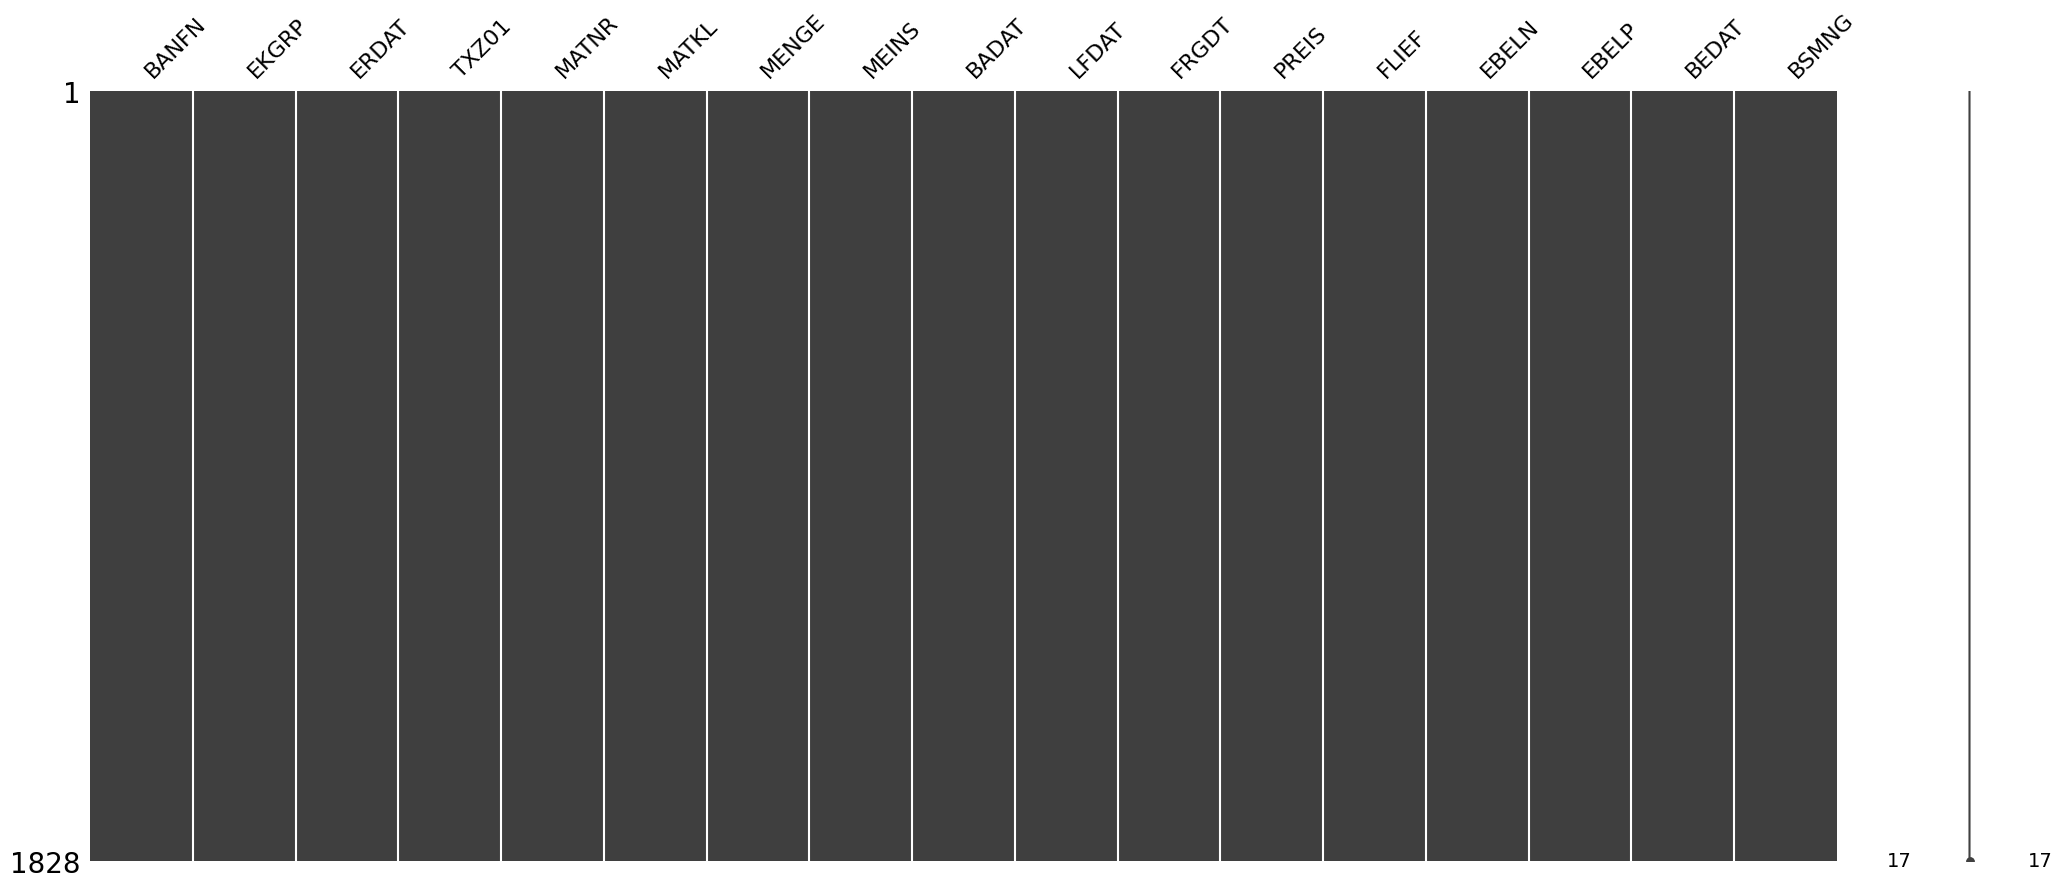

In [35]:
import missingno as msno
%matplotlib inline
msno.matrix(df_cor)

# EXPORT 1 cleaned data with the right dtypes but still with correlating variables

In [36]:
df_cor.to_feather('../Data/D3_EBAN_raw.ftr')

# lets check the dataset properities / Correlation  / distribution

<Axes: >

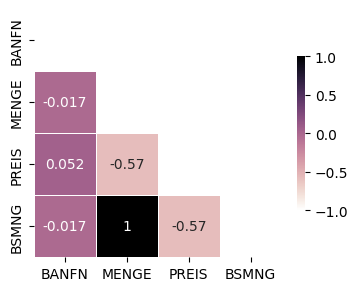

In [37]:
# Compute the corr matrix, only for numerics since we use category dtype
corr = df_cor.corr(numeric_only=True)

# Set up the triangular mask / matplotlib figure / Colors
mask = np.triu(np.ones_like(corr, dtype=bool)) # tril for upper
f, ax = plt.subplots(figsize=(4, 4))
cmap1 = sns.cubehelix_palette(dark=0, light=1, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap1, vmax=1,vmin=-1, center=0, square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .5})


<Axes: >

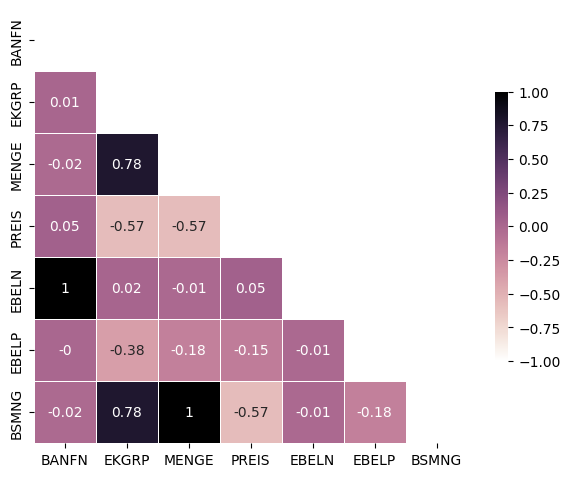

In [38]:

# Compute the corr matrix and 
corr = df.corr(numeric_only=True).round(2)

# Set up the triangular mask / matplotlib figure / Colors
mask = np.triu(np.ones_like(corr, dtype=bool)) # tril for upper
f, ax = plt.subplots(figsize=(7, 7))
cmap1 = sns.cubehelix_palette(dark=0, light=1, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap1, vmax=1,vmin=-1, center=0, square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .5})


In [39]:
df_cor.head(10)

,BANFN,EKGRP,ERDAT,TXZ01,MATNR,MATKL,MENGE,MEINS,BADAT,LFDAT,FRGDT,PREIS,FLIEF,EBELN,EBELP,BEDAT,BSMNG
0,10000000,200,2021-01-25,Large Box (1kg),P01,MANUF,324000,ST,2021-01-25,2021-02-01,2021-01-31,0.28,V02,4500000001,10,2021-01-25,324000
1,10000001,200,2021-01-25,Large Bag (1kg),P02,MANUF,324000,ST,2021-01-25,2021-02-01,2021-01-31,0.12,V02,4500000001,20,2021-01-25,324000
2,10000002,200,2021-01-25,Small Box (500g),P03,MANUF,204000,ST,2021-01-25,2021-02-01,2021-01-31,0.21,V02,4500000001,30,2021-01-25,204000
3,10000003,200,2021-01-25,Small Bag (500g),P04,MANUF,204000,ST,2021-01-25,2021-02-01,2021-01-31,0.09,V02,4500000001,40,2021-01-25,204000
4,10000004,100,2021-01-25,Nuts,R01,MANUF,41940,KG,2021-01-25,2021-02-01,2021-01-31,1.82,V01,4500000000,10,2021-01-25,41940
5,10000005,100,2021-01-25,Blueberries,R02,MANUF,14280,KG,2021-01-25,2021-02-01,2021-01-31,4.00,V01,4500000000,20,2021-01-25,14280
6,10000006,100,2021-01-25,Strawberries,R03,MANUF,14280,KG,2021-01-25,2021-02-01,2021-01-31,4.02,V01,4500000000,30,2021-01-25,14280
7,10000007,100,2021-01-25,Raisins,R04,MANUF,39900,KG,2021-01-25,2021-02-01,2021-01-31,1.07,V01,4500000000,40,2021-01-25,39900
8,10000008,100,2021-01-25,Wheat,R05,MANUF,123000,KG,2021-01-25,2021-02-01,2021-01-31,0.99,V01,4500000000,50,2021-01-25,123000
9,10000009,100,2021-01-25,Oats,R06,MANUF,192600,KG,2021-01-25,2021-02-01,2021-01-31,0.92,V01,4500000000,60,2021-01-25,192600


In [40]:
df.head(10)

,BANFN,EKGRP,ERDAT,TXZ01,MATNR,MATKL,MENGE,MEINS,BADAT,LFDAT,FRGDT,PREIS,FLIEF,EBELN,EBELP,BEDAT,BSMNG
0,10000000,200,2021-01-25,Large Box (1kg),P01,MANUF,324000,ST,2021-01-25,2021-02-01,2021-01-31,0.28,V02,4500000001,10,2021-01-25,324000
1,10000001,200,2021-01-25,Large Bag (1kg),P02,MANUF,324000,ST,2021-01-25,2021-02-01,2021-01-31,0.12,V02,4500000001,20,2021-01-25,324000
2,10000002,200,2021-01-25,Small Box (500g),P03,MANUF,204000,ST,2021-01-25,2021-02-01,2021-01-31,0.21,V02,4500000001,30,2021-01-25,204000
3,10000003,200,2021-01-25,Small Bag (500g),P04,MANUF,204000,ST,2021-01-25,2021-02-01,2021-01-31,0.09,V02,4500000001,40,2021-01-25,204000
4,10000004,100,2021-01-25,Nuts,R01,MANUF,41940,KG,2021-01-25,2021-02-01,2021-01-31,1.82,V01,4500000000,10,2021-01-25,41940
5,10000005,100,2021-01-25,Blueberries,R02,MANUF,14280,KG,2021-01-25,2021-02-01,2021-01-31,4.00,V01,4500000000,20,2021-01-25,14280
6,10000006,100,2021-01-25,Strawberries,R03,MANUF,14280,KG,2021-01-25,2021-02-01,2021-01-31,4.02,V01,4500000000,30,2021-01-25,14280
7,10000007,100,2021-01-25,Raisins,R04,MANUF,39900,KG,2021-01-25,2021-02-01,2021-01-31,1.07,V01,4500000000,40,2021-01-25,39900
8,10000008,100,2021-01-25,Wheat,R05,MANUF,123000,KG,2021-01-25,2021-02-01,2021-01-31,0.99,V01,4500000000,50,2021-01-25,123000
9,10000009,100,2021-01-25,Oats,R06,MANUF,192600,KG,2021-01-25,2021-02-01,2021-01-31,0.92,V01,4500000000,60,2021-01-25,192600


In [41]:
#manually delete the hihgly correlating features in both dataframes
# WRBTR PSWBT VBEL2 POSN2 ERFMG AUFPL SAKNR SAKNR LOKKT KIDNO
df = df.drop(['BSMNG'], axis=1)
df_cor = df_cor.drop(['BSMNG'], axis=1)

<Axes: >

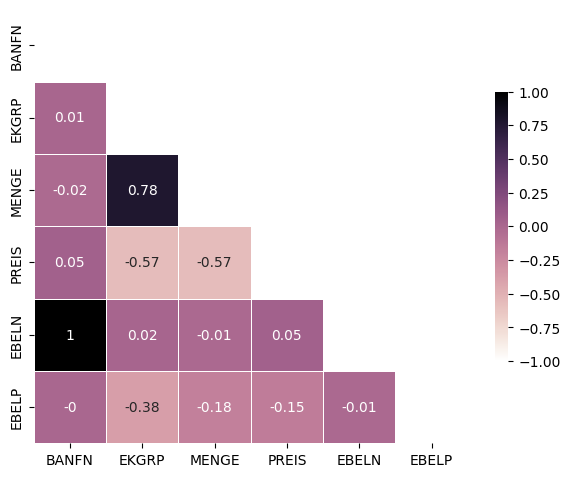

In [42]:

# Compute the corr matrix and 
corr = df.corr(numeric_only=True).round(2)

# Set up the triangular mask / matplotlib figure / Colors
mask = np.triu(np.ones_like(corr, dtype=bool)) # tril for upper
f, ax = plt.subplots(figsize=(7, 7))
cmap1 = sns.cubehelix_palette(dark=0, light=1, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap1, vmax=1,vmin=-1, center=0, square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .5})


In [43]:
df_cor.to_feather('../Data/D3_EBAN_cleaned.ftr')